# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd

#Read in twitter data
twitter_data = pd.read_csv('twitter-archive-enhanced.csv')

In [2]:
#Check if operation has been successful
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests

#Download the tweet image prediction programmically
images_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

#Check if the download has been successful: if successful, status code should be 200
images_predictions.status_code

200

In [4]:
#Transform to dataframe
with open('images_predictions.tsv', "w") as text_file:
    text_file.write(images_predictions.text)

df_images = pd.read_csv('images_predictions.tsv', sep= '\t')

In [5]:
#Check if import as dataframe has been successful
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#Commented code to prevent code from running again :)
'''
import tweepy

consumer_key = 'my_consumer_key'
consumer_secret = 'my_consumer_secret'
access_token = 'my_access_token'
access_secret = 'my_access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)
'''

"\nimport tweepy\n\nconsumer_key = 'my_consumer_key'\nconsumer_secret = 'my_consumer_secret'\naccess_token = 'my_access_token'\naccess_secret = 'my_access_secret'\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit = True)\n"

Date which could be relevant for further analysis: 
- tweet ID = 'id'
- retweet count = 'retweet_count'
- favorite count = 'favorite_count'

In [7]:
import json
from tqdm import tqdm_notebook

'''
with open('tweet_json.txt', 'w') as tweet_json_txt:#
#    make sure that the txt is opened and ready to write
    pass 

for row in tqdm_notebook(twitter_data['tweet_id']):
    try: 
        tweet = api.get_status(row, tweet_mode = "extended")
        tweet_dict = {
            "tweet_id": tweet.id, 
        "retweet_count": tweet.retweet_count, 
            "favorite_count": tweet.favorite_count
        }
    
        with open('tweet_json.txt', 'a') as tweet_json_txt:
            json.dump(tweet_dict, tweet_json_txt)
            tweet_json_txt.write("\n")
    except: 
        pass
'''

'\nwith open(\'tweet_json.txt\', \'w\') as tweet_json_txt:#\n#    make sure that the txt is opened and ready to write\n    pass \n\nfor row in tqdm_notebook(twitter_data[\'tweet_id\']):\n    try: \n        tweet = api.get_status(row, tweet_mode = "extended")\n        tweet_dict = {\n            "tweet_id": tweet.id, \n        "retweet_count": tweet.retweet_count, \n            "favorite_count": tweet.favorite_count\n        }\n    \n        with open(\'tweet_json.txt\', \'a\') as tweet_json_txt:\n            json.dump(tweet_dict, tweet_json_txt)\n            tweet_json_txt.write("\n")\n    except: \n        pass\n'

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



**Assessing the data of twitter_data**

In [8]:
twitter_data.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1907,674447403907457024,NaN,NaN,2015-12-09 04:36:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper just wants a belly rub. This puppe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674447403...,10,10,None,None,None,pupper,None
1319,706516534877929472,NaN,NaN,2016-03-06 16:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please enjoy this pup in a cooler. Permanently...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706516534...,12,10,None,None,None,None,None
18,888554962724278272,NaN,NaN,2017-07-22 00:23:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphus. He's powering up. Attempting ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888554962...,13,10,Ralphus,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None
336,832636094638288896,NaN,NaN,2017-02-17 17:01:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Orion. He just got back from the denti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832636094...,12,10,Orion,None,None,None,None


In [11]:
twitter_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
twitter_data['tweet_id'].nunique()

2356

In [13]:
twitter_data.query('name == "None"')['tweet_id'].nunique()

745

In [14]:
twitter_data['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

We see that the rating_numerator varies from 0 to 1776. Nevertheless, both values 0 and 1776 seem to be outliers in this dataset. 

In [15]:
twitter_data.query('rating_numerator <= 9')['tweet_id'].nunique()

440

We see that 440 tweet_ids have a rating lower than 10. This seems rather atypical to the WeRateDogs philosphy. 

In [16]:
twitter_data.query('rating_numerator < 10').sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2220,668484198282485761,NaN,NaN,2015-11-22 17:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good teamwork between these dogs. One is on lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668484198...,9,10,None,None,None,None,None
2051,671488513339211776,NaN,NaN,2015-12-01 00:38:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Julius. He's a cool dog. Carries seash...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671488513...,8,10,Julius,None,None,None,None
2093,670780561024270336,NaN,NaN,2015-11-29 01:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Traviss. He has no ears. Two rare dogs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670780561...,7,10,Traviss,None,None,None,None
1546,689283819090870273,NaN,NaN,2016-01-19 03:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chipson. He's aerodynamic af. No ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689283819...,9,10,Chipson,None,None,None,None


In [17]:
twitter_data.query('rating_numerator > 100')['tweet_id'].nunique()

11

In [18]:
twitter_data.query('rating_numerator > 100').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


We see that only 11 tweet_ids in the dataset of > 2000 rows have a rating higher than 100. Therefore, these values seem to be outliers in the dataset. 

In [19]:
twitter_data['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [20]:
twitter_data.query('rating_denominator > 10')['tweet_id'].nunique()

20

We see that only very few rows (=20) have a higher rating denominator than 10. 

In [21]:
twitter_data.query('rating_denominator < 10')['tweet_id'].nunique()

3

Only three tweets have a lower denominator than 10. 

In [22]:
timestamp_check = twitter_data.loc[twitter_data['timestamp'].str.contains("\+0000", case=False)]

timestamp_check.shape[0]

2356

All rows have "+0000" at the end. Therefore, all timestamps are in the identical time zone.

**Assessing df_images**

In [23]:
df_images.head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False


In [24]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are 2075 rows in all columns - so this looks complete! 

In [25]:
df_images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2010,878776093423087618,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,2,Italian_greyhound,0.734684,True,whippet,0.150487,True,Ibizan_hound,0.039725,True
722,686003207160610816,https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg,1,damselfly,0.190786,False,common_newt,0.098131,False,whiptail,0.088958,False
2040,885167619883638784,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg,4,malamute,0.812482,True,Siberian_husky,0.071712,True,Eskimo_dog,0.055770,True
759,688804835492233216,https://pbs.twimg.com/media/CY8gWFRWUAAm1XL.jpg,3,malinois,0.199512,True,German_shepherd,0.096797,True,Saluki,0.082848,True
762,688898160958271489,https://pbs.twimg.com/media/CY91OENWUAE5agj.jpg,1,Ibizan_hound,0.853170,True,Chihuahua,0.039897,True,Italian_greyhound,0.035220,True
994,708130923141795840,https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg,1,French_bulldog,0.710354,True,Chihuahua,0.262302,True,Cardigan,0.006904,True
509,676101918813499392,https://pbs.twimg.com/media/CWH_FTgWIAAwOUy.jpg,1,Shih-Tzu,0.225848,True,Norfolk_terrier,0.186873,True,Irish_terrier,0.106987,True
1039,712085617388212225,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,Shih-Tzu,0.625129,True,Tibetan_terrier,0.126897,True,Lhasa,0.119663,True
297,671390180817915904,https://pbs.twimg.com/media/CVFBzpXVEAAHIOv.jpg,1,zebra,0.997673,False,tiger,0.000837,False,prairie_chicken,0.000575,False
392,673580926094458881,https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg,1,beagle,0.985062,True,basset,0.006418,True,Walker_hound,0.003533,True


We see that for cells, which are not a dog breed we have the value "False" in the colums "p1_dog", "p2_dog" and "p3_dog". This information will help us, when cleaning the dataset. 

In [26]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
df_images.query('p1_dog == True')['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'chow', 'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'Italian_greyhound', 'Maltese_dog', 'malamute',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'toy_terrier', 'Blenheim_spaniel',
       'Pembroke', 'Chesapeake_Bay_retriever', 'curly-coated_retriever',
       'dalmatian', 'Ibizan_hound', 'Border_collie', 'Labrador_retriever',
       'miniature_schnauzer', 'Airedale', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'Rottweiler',
       'Siberian_husky', 'papillon', 'Saint_Bernard', 'Tibetan_terrier',
       'borzoi', 'beagle', 'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'standard_poodle',
       'Staffordshire_bullterrier', 'bas

In [28]:
df_images.query('p2_dog == True')['p2'].unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone', 'Rottweiler',
       'English_springer', 'Tibetan_mastiff', 'komondor',
       'Yorkshire_terrier', 'English_foxhound', 'bull_mastiff',
       'German_shepherd', 'Shih-Tzu', 'Newfoundland', 'toy_terrier',
       'toy_poodle', 'Chesapeake_Bay_retriever', 'Siberian_husky',
       'Afghan_hound', 'bloodhound', 'papillon', 'cocker_spaniel', 'chow',
       'Irish_terrier', 'beagle', 'giant_schnauzer', 'Labrador_retriever',
       'Pembroke', 'Chihuahua', 'Weimaraner', 'Brittany_spaniel',
       'standard_schnauzer', 'vizsla', 'pug', 'Italian_greyhound',
       'Samoyed', 'Pomeranian', 'miniature_poodle', 'Lakeland_terrier',
       'Irish_setter', 'malamute', 'Border_collie', 'Leonberg',
       'French_bulldog', 'golden_retriever', 'standard_poodle', 'kuvasz',
       'Cardigan', 'silky_terrier', 'English_setter', 'Pekinese', 'boxer',
       'basset', 'Bedlington_terrier', 'Shetland_sheepdog', 'Lhasa',
       'groenendael', 'Austra

**Assessing tweet_json**

In [29]:
#load the json data and store it in a list
import json

data = []
with open('tweet_json.txt', 'r') as f:    
        for line in f:         
             data.append(json.loads(line))
#create dataframe from json data
df_api = pd.DataFrame(data)
#select columns of interest
columns_of_interest = ['tweet_id', 'retweet_count', 'favorite_count']
df_api = df_api[columns_of_interest]

#Code taken from: https://knowledge.udacity.com/questions/30335 (04.01.2023)

In [30]:
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6877,32890
1,892177421306343426,5178,28425
2,891815181378084864,3422,21368
3,891689557279858688,7086,35857
4,891327558926688256,7596,34306


In [31]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
tweet_id          2325 non-null int64
retweet_count     2325 non-null int64
favorite_count    2325 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [32]:
df_api.sample(10)

,tweet_id,retweet_count,favorite_count
243,843856843873095681,4101,19409
1752,677673981332312066,1321,2965
764,774314403806253056,4995,20008
1079,733828123016450049,703,3224
217,848212111729840128,2668,14607
521,806219024703037440,1105,5969
1356,700518061187723268,710,2331
1791,676575501977128964,974,2278
776,772615324260794368,3060,0
1522,688916208532455424,761,2439


In [33]:
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.416926e+17,2425.037849,6869.961720
std,6.814903e+16,4105.008290,10670.016331
min,6.660209e+17,0.000000,0.000000
25%,6.780233e+17,487.000000,1196.000000
50%,7.177900e+17,1127.000000,2978.000000
75%,7.986285e+17,2805.000000,8396.000000
max,8.924206e+17,69405.000000,141668.000000


### Quality issues

1. **Missing dog names** <br> 
*Dataset "twitter_data"* <br>
We see that for more than 700 rows in our dataset the name of the dog is "none". This makes it difficult to include the name of the dog in our analysis as nearly 1/3 of our dataset is affected by this issue. We should keep this quality issue in mind and it would be an idea to rename it to "no_name" to make clear, what is meant by "None". <br>
<br>

2. **Wrong dog names** <br>
*Dataset "twitter_data"* <br>
We see some obviously wrong names, e.g. for dataset ID 2125 the name "a" is documented altough the name should be "Cherokee". I found out about this issue by using the sample() function. These obviously wrong dog names should be renamed to "invalid_name" to make it clear that for these rows a wrong name has been selected. <br>
<br>

3. **Classifications which are no dog breeds are included in the dataset** <br>
*Dataset "df_images"* <br> 
If we take a closer look at the breeds in the dataset (df_images), we recognize that in some cases the dogs are not classified with any dog breed but with another animal. We see this, for example, in row 199 of the dataset. Here, we have the "dog breeds" weasel, siamese cat and hamster which are wrong classifications in any case. For this reason, the dataset needs to be cleaned and all other classifications than dog breeds should be deleted from the dataset. This can be done for all rows, where p1_dog is False as this classifies the argument in the cell not to be a dog breed. <br>
<br>

4. **Information in columns "p1_dog", "p2_dog", "p3_dog" are no more required after filtering the values of interest** <br> 
*Dataset df_images* <br>
As we only will include values in our cleaned dataset which have the value "True" in this column, it is not required to keep this column. Therefore, we can drop these 3 columns as well. <br>
<br>

5. **Column "timestamp" has datatype string instead of datetime** <br>
*Dataset "twitter_data"* <br>
Currently the timestamp is a string; for easier analysis we should convert the datatype of this coloums from string to datetime. <br>
<br>

6. **Retweets are currently included in the dataset**<br>
*Dataset "twitter_data"*
In the dataset twitter_data currently also 181 retweets are included. To meet the specifications of the tasks (-> do not include retweets) these rows need to be cleaned/ deleted during the cleaning phase to ensure that only original tweets are included in the dataset. <br>
<br>

7. **Columns "retweeted_status_id" and "retweeted_status_user_id" and "retweeted_status_timestamp" are not needed for analysis as we do not want to analyze retweets** <br>
*Dataset "twitter_data"* <br>
As we are going to drop all rows with retweets, these two columns will not contain any more information, which help for our analysis. Therefore, we can drop these two columns.  <br>
<br>

**ADDITIONAL QUALITY ISSUES IDENTIFIED:**

8. **Column "source" as is not needed for further analysis** <br>
*Dataset "twitter_data"* <br>
The column source is not needed for further analysis - therefore, it can be dropped from the dataset. <br>
<br>

9. **"Rating_denominator" in the dataset has different values from "10"** <br>
*Dataset "twitter_data"* <br>
In the project overview it has been stated that the rating_denominator is **almost always** as 10. Therefore, all values in this column should be a "10", too. For this reason, all values, which differ from a 10 should be corrected to a 10 or deleted from the dataset. <br>
<br>

### Tidiness issues
1. **Dog stages (doggo, pupper, puppo, floof) currently in separate columns** <br>
*Dataset "twitter_data"* <br>
The dog stages are currently in separate columns, which makes it more difficult to analyze the different dog stages. Therefore, these four columns should be summarized in only one column "dog stages", which then display which dog stage (doggo, pupper, puppo, floof, NAN) is effective for the tweet. <br>
<br>

2. **twitter_data & df_images currently in different datasets: should be merged** <br>
*Dataset "twitter_data" and "df_images"* <br>
In the dataset df_images we see that only for 2075 tweet_ids an image is available. In our dataset twitter_data we have 2356 tweet_ids. As we only want to analyze tweets with an image, all tweet_ids which do not have a corresponding tweet_id in df_images shall be deleted from the dataframe twitter_data. Afterwards, it would be a good idea to merge the two dataframes, so it is easier to analyze the dataset. <br>
<br>

3. **twitter_data and df_api currently in different datasets: should be merged** <br>
*Dataset "twitter_data" and "df_api"* <br>
After merging twitter_data and df_images, we should merge this new dataframe also with df_api. By doing so, we need to keep in mind that only for 2325 tweets a retweet_count and a favorite_count is available. Therefore, after merging, we need to check, if there are any cells in the dataset, which do not have a value in these two columns. If there are any cells with no value, we could think about to delete these rows. <br>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [34]:
# Make copies of original pieces of data
twitter_data_copy = twitter_data.copy()
df_api_copy = df_api.copy()
df_images_copy = df_images.copy()

In [35]:
twitter_data_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #1: Missing dog names in twitter_data

#### Define: 

- Replace all dog names "None" with "No_name" in the dataset twitter_data

#### Code

In [36]:
twitter_data_copy['name'] = twitter_data_copy['name'].replace(['None'], 'No_name')

#### Test

In [37]:
twitter_data_copy.query('name == "None"')['name'].count()

0

As there are no more values in the column with the value "None" the cleaning has been successful!

### Issue #2: Wrong dog names in dataset twitter_data

#### Define

- Identify all invalid dog names like "a" or "such"
- Replace the invalid dog names to "invalid_name"

#### Code

In [38]:
# Create a list with all dog names
twitter_data_copy['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'No_name', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune'

By scrolling through this list, we see that all the wrong names are lowercase. The correctly identified names are written uppercase. Therefore, we need to identify all lowercase values and replace them. 

In [39]:
# Create a list with all lowercase values

lowercase_name = []

# access each element in the dataframe
for ele in twitter_data_copy['name'].unique():
    if str(ele).islower():
        lowercase_name.append(ele)
print(lowercase_name)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


All lowercase words are no valid dog names. Therefore, we can rename these values to "invalid_name". 

In [40]:
#Replace all invalid names with "invalid_name"
twitter_data_copy['name'] = twitter_data_copy['name'].replace([lowercase_name], 'invalid_name')

#### Test

In [41]:
twitter_data_copy.query('name == "invalid_name"')['name'].count()

109

Cleaning has been successful!

### Issue #3: Classifications which are no dog breeds are included in the dataset

#### Define

- Drop all rows in the dataset df_images, where at least one value in the row in the columns p1_dog, p2_dog or p_3 dog is "False"

#### Code

In [42]:
#Drop the columns based on condition

df_images_copy = df_images_copy.drop(df_images_copy[(df_images_copy.p1_dog == False) | (df_images_copy.p2_dog == False) | (df_images_copy.p3_dog == False)].index)

#### Test

In [43]:
print("Values in column p1_dog", df_images_copy['p1_dog'].unique())
print("Values in column p2_dog", df_images_copy['p2_dog'].unique())
print("Values in column p3_dog", df_images_copy['p3_dog'].unique())

Values in column p1_dog [ True]
Values in column p2_dog [ True]
Values in column p3_dog [ True]


All cells in the three columns have the value "True". Therefore, the cleaning has been successful. 

### Issue #4: Information in columns "p1_dog", "p2_dog", "p3_dog" are no more required after filtering the values of interest

#### Define

- Drop columns p1_dog, p2_dog and p3_dog from dataset df_images as their are not needed for further analysis

#### Code

In [44]:
df_images_copy = df_images_copy.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis = 1)

#### Test

In [45]:
df_images_copy.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.061428


The columns are no longer available! Cleaning successful!

### Issue #5: Convert timestamp to datatype datetime64

#### Define

- In dataset twitter_data convert the column timestamp to datatype datetime64

#### Code

In [46]:
twitter_data_copy['timestamp'] = pd.to_datetime(twitter_data_copy['timestamp'])

#### Test

In [47]:
twitter_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

Converting to datetetime has been successful! 

### Issue #6: Retweets are currently included in the dataset

#### Define

- Delete all rows in dataset twitter_data, which have entries in the column retweeted_status_id, retweetet_status_user_id and retweeted_status_timestamp

#### Code

In [48]:
import numpy as np

In [49]:
twitter_data_copy = twitter_data_copy.drop(twitter_data_copy[(~np.isnan(twitter_data_copy.retweeted_status_id))].index)

#### Test

In [50]:
print("Values in column retweeted_status_id:", twitter_data_copy['retweeted_status_id'].unique())
print("Values in column retweeted_status_user_id:", twitter_data_copy['retweeted_status_user_id'].unique())
print("Values in column retweeted_status_timestamp:", twitter_data_copy['retweeted_status_timestamp'].unique())

Values in column retweeted_status_id: [ nan]
Values in column retweeted_status_user_id: [ nan]
Values in column retweeted_status_timestamp: [nan]


In the three columns we only have "NAN" values so all retweets have been cleaned from the dataset: Cleaning successful!

### Issue #7: Columns "retweeted_status_id" and "retweeted_status_user_id" and "retweeted_status_timestamp" are not needed for analysis as we do not want to analyze retweets

#### Define

- Drop the following columns from the dataset twitter_data_copy: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Code

In [51]:
twitter_data_copy = twitter_data_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [52]:
twitter_data_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Drop of columns has been succesful!

### Issue #8: Column "source" as is not needed for further analysis

#### Define

- Drop column "source" in dataset twitter_data as this column is not needed for further analysis

#### Code

In [53]:
twitter_data_copy = twitter_data_copy.drop(['source'], axis = 1)

#### Test

In [54]:
twitter_data_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Column source has been dropped - cleaning has been successful!

### Issue #9: Rating_denominator" in the dataset has different values from "10"

#### Define

- Delete all rows in the dataset twitter_data_copy, which have a different rating denominator than 10.

#### Code

In [55]:
twitter_data_copy = twitter_data_copy.drop(twitter_data_copy[twitter_data_copy.rating_denominator != 10].index)

In [56]:
twitter_data_copy['rating_denominator'].unique()

array([10])

Now we only have value 10 in the column rating_denominator!

### Issue #10: Dog stages (doggo, pupper, puppo, floof) currently in separate columns

#### Define

- Create a new column "dog_stage" in the dataset twitter_data_copy
- For each row: add the value of the dog stage (values in column doggo,pupper, puppo, floof) to column dog_stage
- If more than one dog stage is available per row, set value "invalid"
- Drop columns "doggo", "pupper", "puppo", "floof"

#### Code

In [57]:
#Add a new column to the dataset twitter_data_copy 
twitter_data_copy['dog_stage'] = "no_data"
twitter_data_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,no_data
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,no_data


In [58]:
def doggo_state_calc(dfinput):
    ret = "invalid"
    if dfinput.doggo == "None" and dfinput.floofer == "None" and dfinput.pupper == "None" and dfinput.puppo == "None":
        ret = "no_data"
    elif dfinput.doggo == "doggo" and dfinput.floofer == "None" and dfinput.pupper == "None" and dfinput.puppo == "None":
        ret = "doggo"
    elif dfinput.doggo == "None" and dfinput.floofer == "floofer" and dfinput.pupper == "None" and dfinput.puppo == "None":
        ret = "floofer"
    elif dfinput.doggo == "None" and dfinput.floofer == "None" and dfinput.pupper == "pupper" and dfinput.puppo == "None":
        ret = "pupper"
    elif dfinput.doggo == "None" and dfinput.floofer == "None" and dfinput.pupper == "None" and dfinput.puppo == "puppo":
        ret = "puppo"
    return ret

twitter_data_copy['dog_stage'] = twitter_data_copy.apply(
                                    doggo_state_calc, axis=1)

In [59]:
#Drop columns 
twitter_data_copy = twitter_data_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [60]:
twitter_data_copy.loc[twitter_data_copy["dog_stage"] == "doggo"].count()
twitter_data_copy.loc[twitter_data_copy["dog_stage"] == "floofer"].count()

tweet_id                 9
in_reply_to_status_id    0
in_reply_to_user_id      0
timestamp                9
text                     9
expanded_urls            9
rating_numerator         9
rating_denominator       9
name                     9
dog_stage                9
dtype: int64

Columns have been deleted successfully!

In [61]:
twitter_data_copy['dog_stage'].unique()

array(['no_data', 'doggo', 'puppo', 'pupper', 'floofer', 'invalid'], dtype=object)

We have transferred the corresponding values to column dog_stage!

### Issue #11: twitter_data & df_images currently in different datasets: should be merged

#### Define

- Merge the datasets twitter_data and df_images based on tweet_id

#### Code

In [62]:
twitter_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 2153 non-null int64
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2153 non-null datetime64[ns]
text                     2153 non-null object
expanded_urls            2099 non-null object
rating_numerator         2153 non-null int64
rating_denominator       2153 non-null int64
name                     2153 non-null object
dog_stage                2153 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 185.0+ KB


In [63]:
df_images_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 9 columns):
tweet_id    1243 non-null int64
jpg_url     1243 non-null object
img_num     1243 non-null int64
p1          1243 non-null object
p1_conf     1243 non-null float64
p2          1243 non-null object
p2_conf     1243 non-null float64
p3          1243 non-null object
p3_conf     1243 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 97.1+ KB


In [64]:
merged_df = pd.merge(twitter_data_copy, df_images_copy, on='tweet_id', how='left')

#### Test

In [65]:
merged_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,no_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,no_data,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,no_data,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,malamute,0.078253,kelpie,0.031379
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,no_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,no_data,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219


In [66]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 18 columns):
tweet_id                 2153 non-null int64
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2153 non-null datetime64[ns]
text                     2153 non-null object
expanded_urls            2099 non-null object
rating_numerator         2153 non-null int64
rating_denominator       2153 non-null int64
name                     2153 non-null object
dog_stage                2153 non-null object
jpg_url                  1189 non-null object
img_num                  1189 non-null float64
p1                       1189 non-null object
p1_conf                  1189 non-null float64
p2                       1189 non-null object
p2_conf                  1189 non-null float64
p3                       1189 non-null object
p3_conf                  1189 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(8)

### Issue #12: twitter_data and df_api currently in different datasets: should be merged

#### Define

- Merge the two datasets merge_df (merged dataframes twitter_data and df_images) and the df_api

#### Code

In [67]:
merged_df = pd.merge(merged_df, df_api_copy, on='tweet_id', how='left')

#### Test

In [68]:
merged_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,no_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6877.0,32890.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,no_data,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957,5178.0,28425.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,no_data,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,3422.0,21368.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,no_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7086.0,35857.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,no_data,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,7596.0,34306.0


In [69]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 20 columns):
tweet_id                 2153 non-null int64
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2153 non-null datetime64[ns]
text                     2153 non-null object
expanded_urls            2099 non-null object
rating_numerator         2153 non-null int64
rating_denominator       2153 non-null int64
name                     2153 non-null object
dog_stage                2153 non-null object
jpg_url                  1189 non-null object
img_num                  1189 non-null float64
p1                       1189 non-null object
p1_conf                  1189 non-null float64
p2                       1189 non-null object
p2_conf                  1189 non-null float64
p3                       1189 non-null object
p3_conf                  1189 non-null float64
retweet_count            2145 non-null float64
favorite_co

### Final cleaning to create clean dataset

#### Define
- Drop columns "in_reply_to_status_id" & "in_reply_to_user_id"
- Drop all rows which do not have an image
- Check if all columns have the same amount of values

#### Code

In [70]:
merged_df = merged_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)

In [71]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 18 columns):
tweet_id              2153 non-null int64
timestamp             2153 non-null datetime64[ns]
text                  2153 non-null object
expanded_urls         2099 non-null object
rating_numerator      2153 non-null int64
rating_denominator    2153 non-null int64
name                  2153 non-null object
dog_stage             2153 non-null object
jpg_url               1189 non-null object
img_num               1189 non-null float64
p1                    1189 non-null object
p1_conf               1189 non-null float64
p2                    1189 non-null object
p2_conf               1189 non-null float64
p3                    1189 non-null object
p3_conf               1189 non-null float64
retweet_count         2145 non-null float64
favorite_count        2145 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(8)
memory usage: 319.6+ KB


In [72]:
merged_df = merged_df.drop(merged_df[merged_df.jpg_url.isnull()].index)

In [73]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 1 to 2152
Data columns (total 18 columns):
tweet_id              1189 non-null int64
timestamp             1189 non-null datetime64[ns]
text                  1189 non-null object
expanded_urls         1189 non-null object
rating_numerator      1189 non-null int64
rating_denominator    1189 non-null int64
name                  1189 non-null object
dog_stage             1189 non-null object
jpg_url               1189 non-null object
img_num               1189 non-null float64
p1                    1189 non-null object
p1_conf               1189 non-null float64
p2                    1189 non-null object
p2_conf               1189 non-null float64
p3                    1189 non-null object
p3_conf               1189 non-null float64
retweet_count         1182 non-null float64
favorite_count        1182 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(8)
memory usage: 176.5+ KB


Delete the rows which do not have a favorite_count, as we only have 1182 values in column favorite_count and retweet_count

In [74]:
merged_df = merged_df.drop(merged_df[merged_df.favorite_count.isnull()].index)

In [75]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 1 to 2152
Data columns (total 18 columns):
tweet_id              1182 non-null int64
timestamp             1182 non-null datetime64[ns]
text                  1182 non-null object
expanded_urls         1182 non-null object
rating_numerator      1182 non-null int64
rating_denominator    1182 non-null int64
name                  1182 non-null object
dog_stage             1182 non-null object
jpg_url               1182 non-null object
img_num               1182 non-null float64
p1                    1182 non-null object
p1_conf               1182 non-null float64
p2                    1182 non-null object
p2_conf               1182 non-null float64
p3                    1182 non-null object
p3_conf               1182 non-null float64
retweet_count         1182 non-null float64
favorite_count        1182 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(8)
memory usage: 175.5+ KB


Now our merged dataset looks tidied up!

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [76]:
merged_df.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [77]:
merged_df['favorite_count'].mean()

7801.3587140439931

The average favorite count in the dataset is 7801. 

In [78]:
#Check the distribution of the dog breeds
merged_df.p1.value_counts()

golden_retriever                  115
Pembroke                           77
Labrador_retriever                 70
Chihuahua                          50
pug                                39
Pomeranian                         28
malamute                           26
chow                               26
toy_poodle                         25
Samoyed                            24
cocker_spaniel                     23
miniature_pinscher                 20
French_bulldog                     19
beagle                             17
German_shepherd                    17
Siberian_husky                     16
Shih-Tzu                           15
Rottweiler                         15
Chesapeake_Bay_retriever           15
Shetland_sheepdog                  15
Staffordshire_bullterrier          15
Cardigan                           14
Eskimo_dog                         14
Maltese_dog                        14
Italian_greyhound                  13
Lakeland_terrier                   13
Border_colli

In [79]:
#Check which dog breeds have the highest favorite counts
(merged_df.groupby('p1')[['favorite_count']].mean()).sort_values(by=['favorite_count'], ascending = False)

,favorite_count
p1,
Irish_water_spaniel,21053.000000
Saluki,20216.250000
standard_poodle,17308.400000
French_bulldog,16772.578947
black-and-tan_coonhound,14228.500000
Eskimo_dog,14072.000000
flat-coated_retriever,14039.125000
English_springer,13090.777778
Lakeland_terrier,12845.846154


In [80]:
#Analyze the distribution of the dog stages in the dataset
merged_df.dog_stage.value_counts()

no_data    993
pupper     119
doggo       38
puppo       18
invalid      8
floofer      6
Name: dog_stage, dtype: int64

In [81]:
#Analyze the distribution of the dog breed and the rating numerator
(merged_df.groupby('p1')[['rating_numerator']].mean()).sort_values(by=['rating_numerator'], ascending = False)

,rating_numerator
p1,
clumber,27.000000
Saluki,12.500000
briard,12.333333
Irish_setter,12.333333
Tibetan_mastiff,12.250000
kuvasz,12.181818
Border_terrier,12.142857
Irish_water_spaniel,12.000000
silky_terrier,12.000000


In [82]:
#Top Ten dog breeds relatd to rating numerator
(merged_df.groupby('p1')[['rating_numerator']].mean()).nlargest(10, 'rating_numerator')

,rating_numerator
p1,
clumber,27.000000
Saluki,12.500000
Irish_setter,12.333333
briard,12.333333
Tibetan_mastiff,12.250000
kuvasz,12.181818
Border_terrier,12.142857
Irish_water_spaniel,12.000000
giant_schnauzer,12.000000


In [83]:
#Analyze the distribution of the dog breed and the retweet count
(merged_df.groupby('p1')[['retweet_count']].mean()).sort_values(by=['retweet_count'], ascending = False)

,retweet_count
p1,
standard_poodle,7094.600000
Eskimo_dog,5269.214286
English_springer,4777.222222
Irish_water_spaniel,4770.000000
Lakeland_terrier,4207.461538
French_bulldog,4169.578947
Great_Pyrenees,4111.333333
Saluki,4050.500000
Samoyed,3910.291667


In [84]:
#Top Ten dog breeds related to retweet count
(merged_df.groupby('p1')[['retweet_count']].mean()).nlargest(10, 'retweet_count')

,retweet_count
p1,
standard_poodle,7094.600000
Eskimo_dog,5269.214286
English_springer,4777.222222
Irish_water_spaniel,4770.000000
Lakeland_terrier,4207.461538
French_bulldog,4169.578947
Great_Pyrenees,4111.333333
Saluki,4050.500000
Samoyed,3910.291667


In [85]:
#Top Ten dog breeds related to favorite count
(merged_df.groupby('p1')[['favorite_count']].mean()).nlargest(10, 'favorite_count')

,favorite_count
p1,
Irish_water_spaniel,21053.000000
Saluki,20216.250000
standard_poodle,17308.400000
French_bulldog,16772.578947
black-and-tan_coonhound,14228.500000
Eskimo_dog,14072.000000
flat-coated_retriever,14039.125000
English_springer,13090.777778
Lakeland_terrier,12845.846154


### Insights:
1. **Most famous dog breeds in WeRateDogs dataset** <br>
In most of the tweets the breed is a golden retriever (115 tweets), followed by a Pembroke (77 tweets) and a labrador retriever (70 tweets) and chihuahua (50 tweets). Therefore, we see that these breeds are most famous for tweets on WeRateDogs. <br>
<br>

2. **Most famous dog stages in WeRateDogs dataset** <br>
We see that nearly 50% of the data have no data in related to the dog stage. Therefore, the information related to the dog stage is probably not really significant in this dataset. The dog stage, which is most popular in the WeRateDogs dataset is pupper. <br>
<br>

3. **Breeds that have the highest favorite counts in the WeRateDogs dataset** <br>
The breeds with the highest favorite counts in the dataset are Irish water spaniel (21053 counts), followed by Saluki (20216 counts) and standard poodle (17308 counts). Therefore, we can conclude: if we post an image of one of these breeds,it is more likely that they will have high favorite counts. <br> 
On the other hand we see that the breeds with the lowest favorite counts are ibizian hound (911 counts) and brabancon griffon (725 counts). These breeds do not seem to be popular within WeRateDogs. <br>
<br>

4. **Breeds with the highest average rating (rating_numerator)**<br>
The dog breeds with the highest average ratings are clumber (rating: 27.0) followed by saluki (rating: 12.5) and briard (rating: 12.33) and irish setter (rating 12.33). Therefore, these breeds seem to have higher ratings in the tweet.<br>
The breeds with the lowest average ratings are afghan hound (rating: 8.0) and japanese spaniel (5.0). <br>
<br>

5. **Breeds with the highest average retweet count in the WeRateDogs dataset** <br>
The breeds with the highest retweet counts are standard poodle (7094 retweets in average) followed by eskimo hound (5269 retweets in average) and english springer (4777 retweets in average). Therefore, we can conclude that the amount of retweets for these dog breeds on WeRateDogs are higher compared to the remaining dog breeds. <br>
Additionally, we can see that cairn (239 retweets in average) and brabancon griffon (224 retweets in average) have in average the lowest number of retweets in the dataset. Therefore, we can conclude, that is is less likely that users will retweet tweets, which show images of these breeds. <br>
<br>

6. **Breeds with the highest average favorite count in the WeRateDogs dataset** <br>
The dog breed with the most likes on WeRateDogs is the Irish water spaniel (21053 likes) followed by the Saluki (20216 likes) and the standard poodle (17308 likes) and the french bulldog (16772 likes). These four dog breeds seem to be the favorites of the WeRateDogs audience. <br>
<br>


Nevertheless, as it was not possible to use the whole/initial data in the initial datasets due to data quality issues, it could be, that we would receive different result, if we would have had a high quality dataframe right from the beginning: e.g. many dog breeds had wrong data (e.g. paper_towel, hamster) in our initial dataset. As these data had been dropped from the dataset, it could be that the different dog breed would have different retweet counts or average rating, if they would have been classified correctly in the initial dataset. 

### Visualization

In [86]:
import matplotlib.pyplot as plt
merged_df.dog_stage.value_counts().plot(kind = 'bar')

plt.title ('Distribution of dog stages in WeRateDogs')
plt.xlabel("Dog stages")
plt.ylabel("Amount of tweets in WeRateDogs")

plt.legend();

Most of the tweets have no dog stage. From the given classifications for the dog stages, pupper has been the most popular one. 

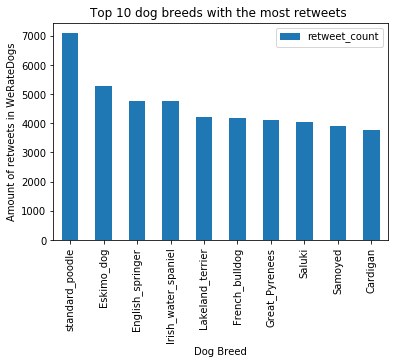

In [87]:
#Visualization Top 10 Dog breeds related to retweet_count

(merged_df.groupby('p1')[['retweet_count']].mean()).nlargest(10, 'retweet_count').plot(kind = 'bar')

plt.title ('Top 10 dog breeds with the most retweets ')
plt.xlabel("Dog Breed")
plt.ylabel("Amount of retweets in WeRateDogs")

plt.legend();

The breed with the most retweets in the dataset is the standard poodle!

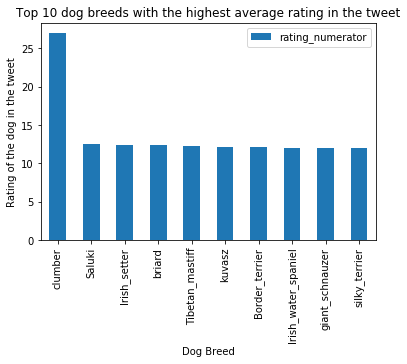

In [88]:
#Visualization Top 10 Dog breeds related to rating_numerator

(merged_df.groupby('p1')[['rating_numerator']].mean()).nlargest(10, 'rating_numerator').plot(kind = 'bar')

plt.title ('Top 10 dog breeds with the highest average rating in the tweet')
plt.xlabel("Dog Breed")
plt.ylabel("Rating of the dog in the tweet")

plt.legend();

The breed with the highest average rating is the dumber. The following 9 breeds have a very similar average rating. 

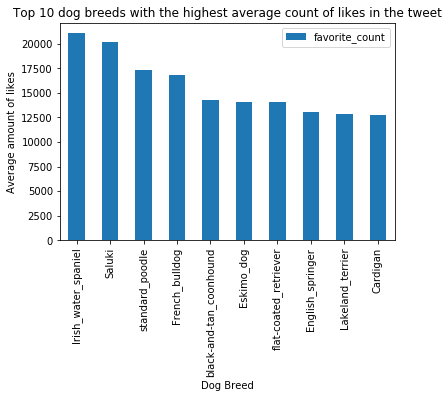

In [89]:
#Visualization Top 10 Dog breeds related to favorite_count

(merged_df.groupby('p1')[['favorite_count']].mean()).nlargest(10, 'favorite_count').plot(kind = 'bar')

plt.title ('Top 10 dog breeds with the highest average count of likes in the tweet')
plt.xlabel("Dog Breed")
plt.ylabel("Average amount of likes")

plt.legend();